In [9]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()).parent)) # add parent directory to path to import python files from there

import gsd_uncertainty
import plotting
import data_loader

In [10]:
PATH = "F:/cellpose/fh/"
gsds = data_loader.load_grain_set([PATH],gsd_str='_grain')
num_it  = 100
column_name='ell: a-axis (px)'

In [11]:
os.path.dirname(gsds[0])

'F:/cellpose/fh//test'

## Calculate percentile uncertainties

In [12]:
# Percentile uncertainty with bootstrapping (counting statistics only)
res_dict_bs = gsd_uncertainty.dataset_uncertainty(gsds=gsds,num_it=num_it,mute=True,column_name=column_name,return_results=True)

bootstrapping: 100%|██████████| 7/7 [00:00<00:00, 17.33gsd/s]


In [13]:
# Percentile uncertainty with Monte Carlo (counting statistics & scale, length uncertainty)
res_dict_MC = gsd_uncertainty.dataset_uncertainty(gsds,num_it=num_it,mute=True,column_name=column_name,method='MC',return_results=True)

MC: 100%|██████████| 7/7 [00:26<00:00,  3.72s/gsd]


In [15]:
#Load error input for SfM from file
sfm_error_l = gsd_uncertainty.compile_sfm_error(from_file='F:/cellpose/x_pre_Nov_22/code_demo/OM_err.csv')

In [16]:
# Percentile uncertainty with Monte Carlo (counting statistics & scale, length uncertainty from SfM - OM)
res_dict_om = gsd_uncertainty.dataset_uncertainty(gsds,method='MC_SfM',sfm_error=sfm_error_l,sfm_type='OM',num_it=num_it,mute=True,column_name=column_name)

MC_SfM: 100%|██████████| 7/7 [00:33<00:00,  4.78s/gsd]


In [17]:
# Percentile uncertainty with Monte Carlo (counting statistics & scale, length uncertainty from SfM - SI)
res_dict_si = gsd_uncertainty.dataset_uncertainty(gsds,method='MC_SfM',sfm_error=sfm_error_l,num_it=num_it,mute=True,column_name=column_name)

MC_SfM: 100%|██████████| 7/7 [00:25<00:00,  3.64s/gsd]


### Compare uncertainty methods

In [23]:
mcs,ids = data_loader.read_set_unc(PATH)
mcs = [k for k in mcs if 'mask' in k]
elem={
        'CI_bounds':'','median':'',
        'colors':[plt.cm.get_cmap('tab20')(i) for i in range(len(mcs))]
}

['F:/cellpose/fh//test\\4_P1060348_3_mask_grainsMC_SfM_perc_uncert.txt', 'F:/cellpose/fh//test\\4_P1060348_3_mask_grainsMC_perc_uncert.txt', 'F:/cellpose/fh//test\\4_P1060348_3_mask_grainsbootstrapping_perc_uncert.txt', 'F:/cellpose/fh//train\\1_P1060330_1_mask_grainsMC_SfM_perc_uncert.txt', 'F:/cellpose/fh//train\\1_P1060330_1_mask_grainsMC_perc_uncert.txt', 'F:/cellpose/fh//train\\1_P1060330_1_mask_grainsbootstrapping_perc_uncert.txt', 'F:/cellpose/fh//train\\2_P1060338_0_mask_grainsMC_SfM_perc_uncert.txt', 'F:/cellpose/fh//train\\2_P1060338_0_mask_grainsMC_perc_uncert.txt', 'F:/cellpose/fh//train\\2_P1060338_0_mask_grainsbootstrapping_perc_uncert.txt', 'F:/cellpose/fh//train\\3_P1060343_3_mask_grainsMC_SfM_perc_uncert.txt', 'F:/cellpose/fh//train\\3_P1060343_3_mask_grainsMC_perc_uncert.txt', 'F:/cellpose/fh//train\\3_P1060343_3_mask_grainsbootstrapping_perc_uncert.txt', 'F:/cellpose/fh//train\\5_P1060351_2_mask_grainsMC_SfM_perc_uncert.txt', 'F:/cellpose/fh//train\\5_P1060351_2_mask

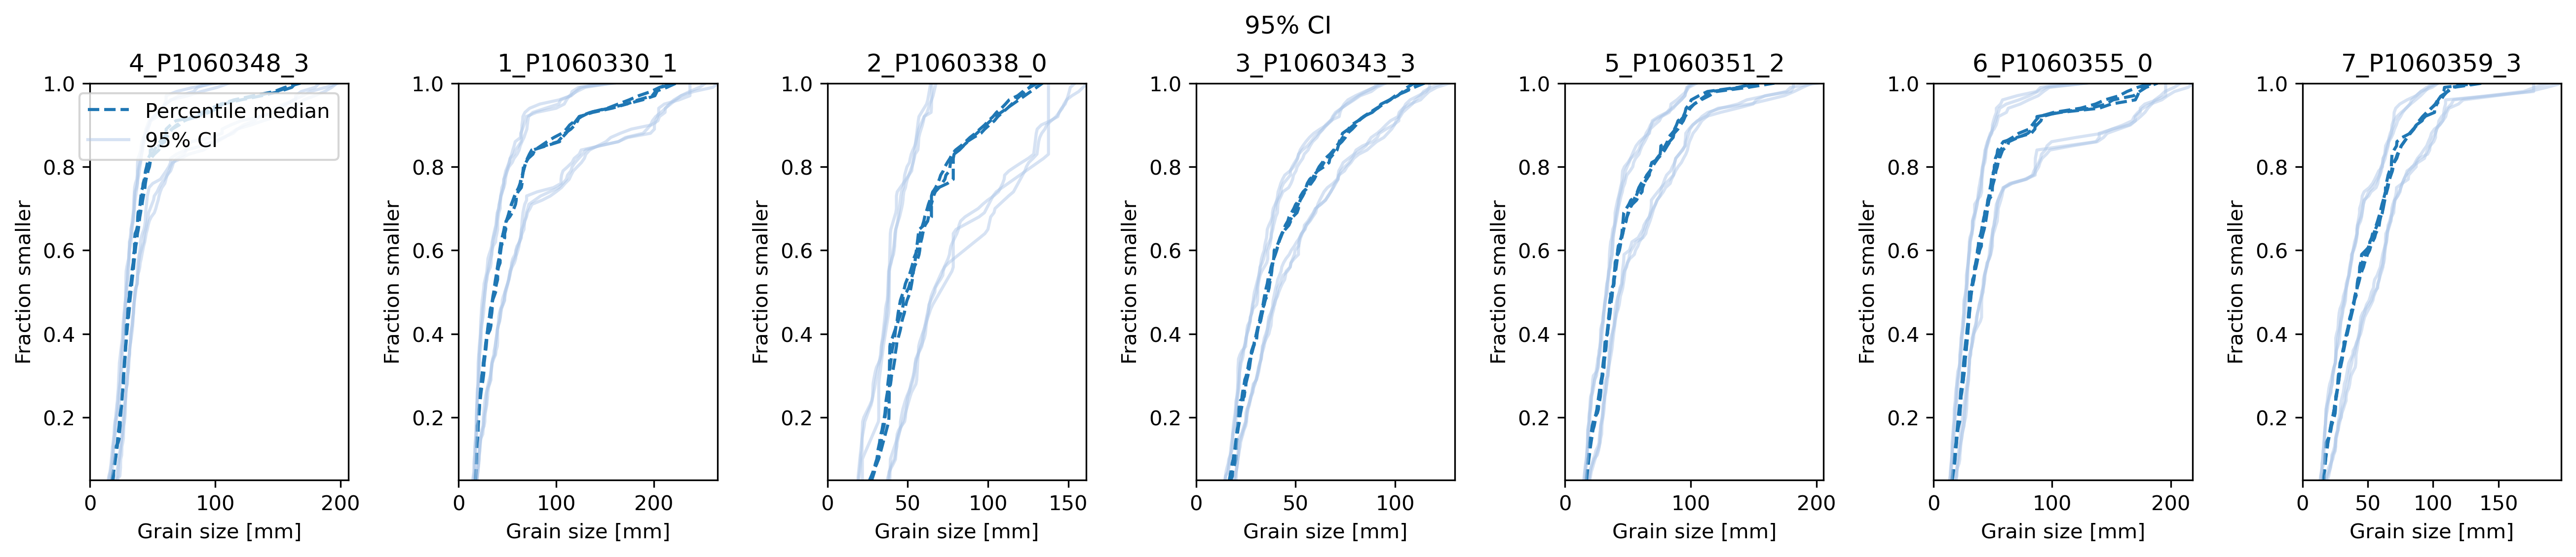

In [25]:
fig = plt.figure(figsize=(len(ids)*2.5,10), dpi=300)
for j in range(len(ids)):
    for i in range(len(mcs)):
        if ids[j] in mcs[i]:
            df = data_loader.read_unc(mcs[i])
            plt.subplot(3,len(ids),j+1)
            plotting.plot_gsd(df,elem=elem)
            plt.title(ids[j])
            if i == 0:
                plt.legend()
    plt.xlabel('Grain size [mm]'), plt.ylabel('Fraction smaller')
plt.suptitle('95% CI')
plt.tight_layout()

### Compare images

In [26]:
elem={
        'CI_area':'','input':'',
        'colors':[plt.cm.get_cmap('tab20')(i) for i in range(len(mcs))]
}

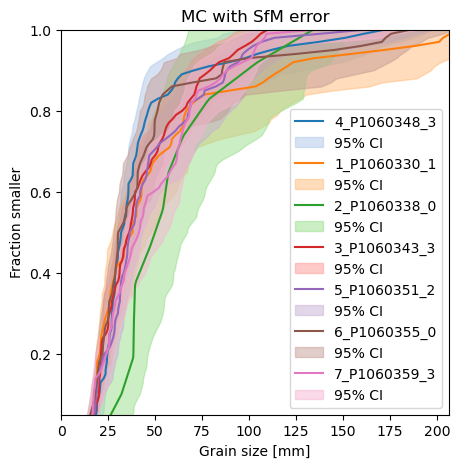

In [27]:
plt.figure(figsize=(5,5))
cix=0
for j in range(len(ids)):
    for i in range(len(mcs)):
        if ids[j] in mcs[i]:
            if 'SfM' in mcs[i]:
                df = data_loader.read_unc(mcs[i])
                plotting.plot_gsd(df,elem=elem,data_ID=ids[j],cix=cix)
    cix+=2
plt.title('MC with SfM error')
plt.xlabel('Grain size [mm]'), plt.ylabel('Fraction smaller')
plt.legend();